In [1]:
#馬可夫鏈是一種隨機過程，其特點是下一個狀態的概率僅取決於當前狀態，而與之前的狀態無關。這種特性稱為「無記憶性」或「馬可夫性質」。
#讓我們用一個簡單的天氣預報模型來說明馬可夫鏈：
#假設我們有三種天氣狀態：晴天、多雲和雨天。每種天氣轉變為其他天氣的概率如下：

#晴天：下一天仍為晴天的概率為 0.7，變為多雲的概率為 0.2，變為雨天的概率為 0.1
#多雲：變為晴天的概率為 0.4，仍為多雲的概率為 0.4，變為雨天的概率為 0.2
#雨天：變為晴天的概率為 0.2，變為多雲的概率為 0.3，仍為雨天的概率為 0.5

/Users/zhongbingzhang/miniforge3/envs/tensorwork/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhongbingzhang/miniforge3/envs/tensorwork/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhongbingzhang/miniforge3/envs/tensorwork/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhongbingzhang/miniforge3/envs/tensorwork/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhongbingzhang/miniforge3/envs/tensorwork/lib

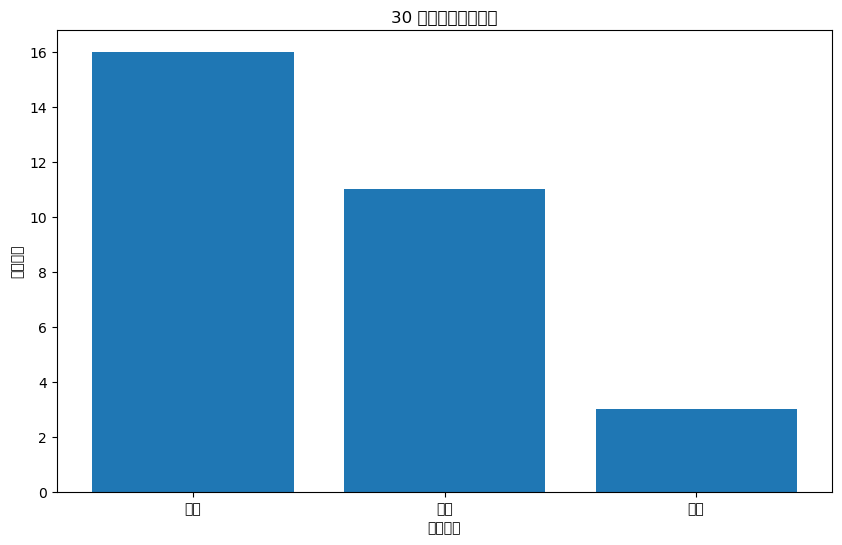

模擬的天氣序列：
晴天 -> 雨天 -> 雨天 -> 雨天 -> 多雲 -> 多雲 -> 晴天 -> 晴天 -> 多雲 -> 晴天 -> 晴天 -> 多雲 -> 多雲 -> 多雲 -> 晴天 -> 晴天 -> 晴天 -> 晴天 -> 多雲 -> 多雲 -> 多雲 -> 晴天 -> 晴天 -> 晴天 -> 晴天 -> 晴天 -> 多雲 -> 晴天 -> 晴天 -> 多雲


In [2]:
import numpy as np
import matplotlib.pyplot as plt

transition_matrix = np.array([
    [0.7, 0.2, 0.1],  # 晴天
    [0.4, 0.4, 0.2],  # 多雲
    [0.2, 0.3, 0.5]   # 雨天
])


states = ["晴天", "多雲", "雨天"]


def simulate_markov_chain(days, initial_state):
    current_state = initial_state
    states_history = [current_state]
    
    for _ in range(days - 1):
        current_state = np.random.choice(3, p=transition_matrix[current_state])
        states_history.append(current_state)
    
    return states_history


days = 30
initial_state = 0  # 從晴天開始
simulation = simulate_markov_chain(days, initial_state)

# 統計每種天氣的出現次數
weather_counts = [simulation.count(i) for i in range(3)]


plt.figure(figsize=(10, 6))
plt.bar(states, weather_counts)
plt.title(f"{days} 天的天氣模擬結果")
plt.xlabel("天氣狀態")
plt.ylabel("出現次數")
plt.show()


print("模擬的天氣序列：")
print(" -> ".join([states[s] for s in simulation]))